<div style="text-align: center;">
    <img src="../images/iofbanner.png" alt="Banner curso" style="width:80%">
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tema 7
## Tsunami

Text(0, 0.5, 'velocidad de propagación en km/hr')

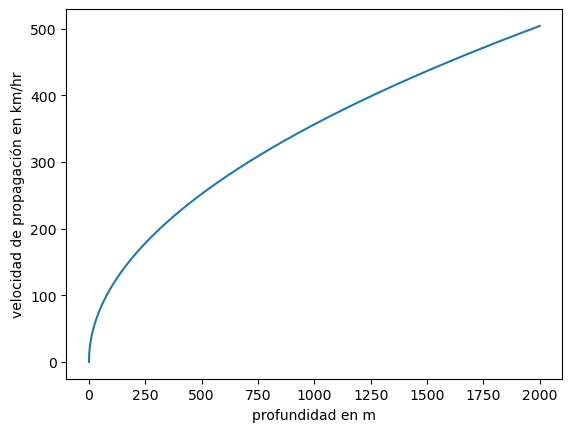

In [6]:
# Propagacion de una onda en  aguas someras (tsunami)
h   = np.array(range(2001))

# calculo de la velocidad de propagación de una onda larga
C   = np.sqrt(9.81 * h);
C2  = C * 3.6   # convertir a km/hr
plt.plot(h,C2)
plt.xlabel('profundidad en m')
plt.ylabel('velocidad de propagación en km/hr')

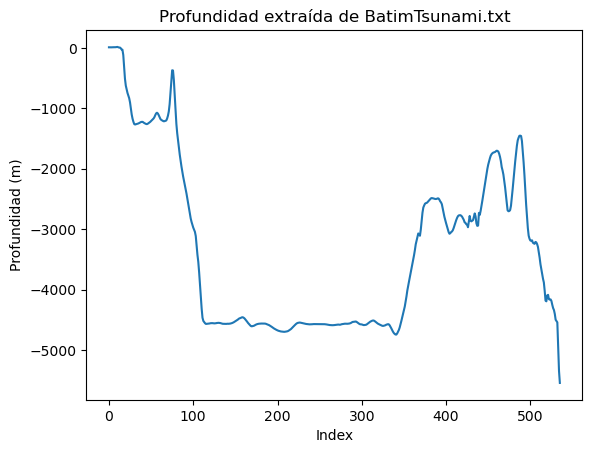

In [7]:
# Calculo con datos batimétricos
BAT = np.loadtxt('../resources/BatimTsunami.txt')
h   = BAT[:,3]            # profundidad en m - debe ser positiva
plt.plot(h)
plt.xlabel('Index')
plt.ylabel('Profundidad (m)')
plt.title('Profundidad extraída de BatimTsunami.txt')
i=14                      # dato desde el cual el perfil es solo batimétrico (elimina datos en tierra)
x   = BAT[i:,2]           # distancia en km
h2  = h[i:]
# h = np.flipud(h)

Text(0, 0.5, 'velocidad de propagación en km/hr')

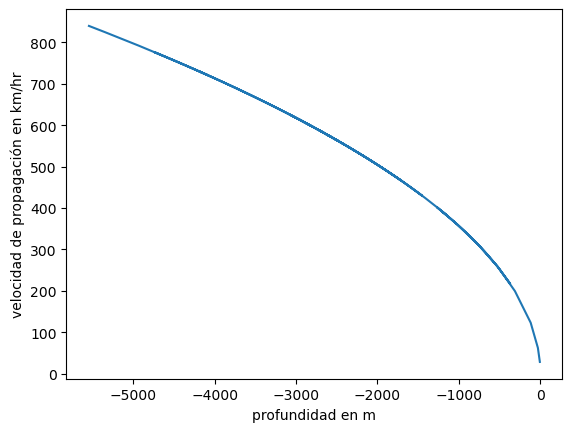

In [8]:
# calculo de la velocidad de propagación de una onda larga
C   = np.sqrt(9.81 * -h2);
C2  = C * 3.6                   # convertir a km/hr
plt.plot(h2,C2)
plt.xlabel('profundidad en m')
plt.ylabel('velocidad de propagación en km/hr')

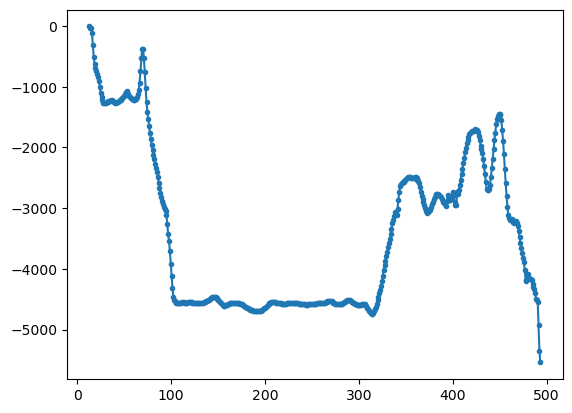

In [9]:
plt.plot(x, h2, '.-')

In [19]:
# Calculo del tiempo que tarda en llegar
dx      = (x[1:] - x[0:-1]) * 1000;
t       = dx / C[1:]
ttot    = np.sum(t) / 60;

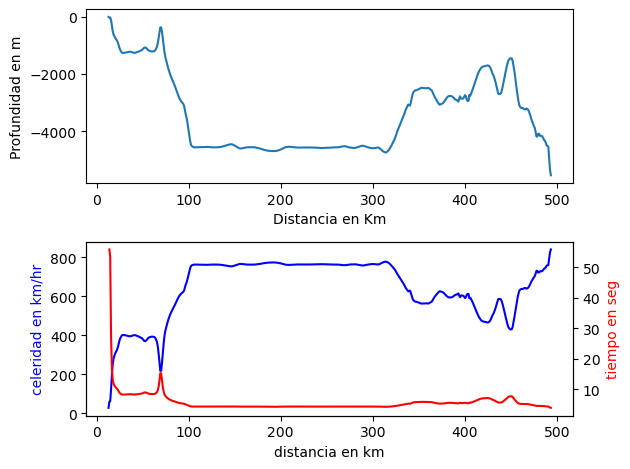

In [20]:
fig, axs = plt.subplots(2)

axs[0].plot(x, h2)
axs[0].set_xlabel('Distancia en Km')
axs[0].set_ylabel('Profundidad en m')

# Graficar t en el eje derecho
# Crear el eje de la derecha y graficar
axt = axs[1].twinx()                            # Crear un segundo eje que comparte el mismo eje x
axt.plot(x[1:], t, color='r')                   
axt.set_ylabel('tiempo en seg', color='r')

# Graficar C2 en el eje izquierdo
axs[1].plot(x, C2, color='b')
axs[1].set_ylabel('celeridad en km/hr', color='b')
axs[1].set_xlabel('distancia en km')

plt.tight_layout()  # Ajustar el espaciado entre las subgráficas

## Marea Tormenta Ekman Costero

In [21]:
# Ekman en una frontera costera...efecto del viento en las costas
# Esfuerzo de cizalla del viento
rhoa    = 1.25
W10     = 30                            # m/s velocidad del viento...*3.6 a km/hr
Cd      = 2.3e-3
# Cd      = (0.063 + 0.066 * W10) * 1e-3
Tw      = rhoa * Cd * W10**2
Tw      = Tw                            # Negativo es viento con la costa a la izquierda, positivo a la derecha

In [22]:
# parámetro de Coriolis
lat = 25 * (np.pi / 180)
Om  = 2 * np.pi / (24 * 3600)
f   = 2 * Om * np.sin(lat)

In [23]:
# en unidades SI
g       = 9.81      # Aceleración de la gravedad
rhow    = 1027      # densidad promedio

In [24]:
off     = -800                                      # distancia hacia afuera de la costa en km
x       = np.arange(off*1000, -1, 1)     # vector de distancia costafuera en metros
h       = 200                                       # profundidad - 30
horas   = 10                                        # tiempo en el que sopla el viento
t       = np.array(np.arange(0, 3601 * horas, 3600)) 

In [25]:
# Número de Rosby
c   = np.sqrt(g * h)
Ro  = c / f

In [26]:
# elevación
eta = np.zeros((x.size, t.size))
for i in range(t.size):
  eta[:, i] = (Tw / (rhow * c)) * t[i] * np.exp(x / Ro)

Text(0.5, 0, 'Distancia en km')

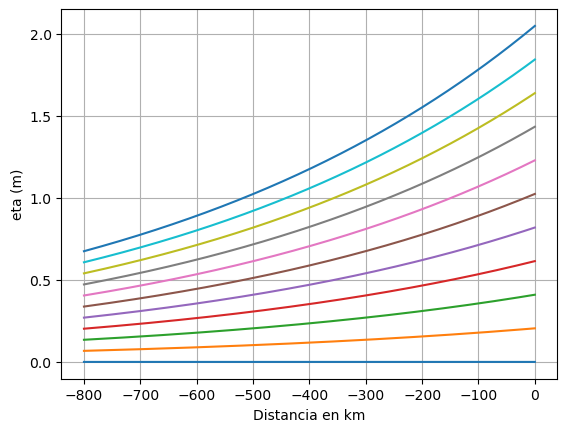

In [27]:
plt.plot(x/1000, eta)
plt.grid()
plt.ylabel('eta (m)')
plt.xlabel('Distancia en km')

## Marea Simple

In [16]:
# periodos, amplitudes y fases en radianes  diurnas
T1 = 12.42
T2 = 12
a1 = 1
a2 = 1
e1 = 0
e2 = 0

In [17]:
# fabricaciòn del vector tiempo
dias    = 28*24                         # calculo de la cantidad de datos (numero de días en formato horas)
t       = np.arange(0, dias+0.5, 0.5)                    # vector de tiempo

In [18]:
ETA1    = a1 * np.cos((2 * np.pi / T1) * t + e1)
ETA2    = a2 * np.cos((2 * np.pi / T2) * t + e2)
ETA     = ETA1 + ETA2

Text(0.5, 1.0, 'sumatoria (total)')

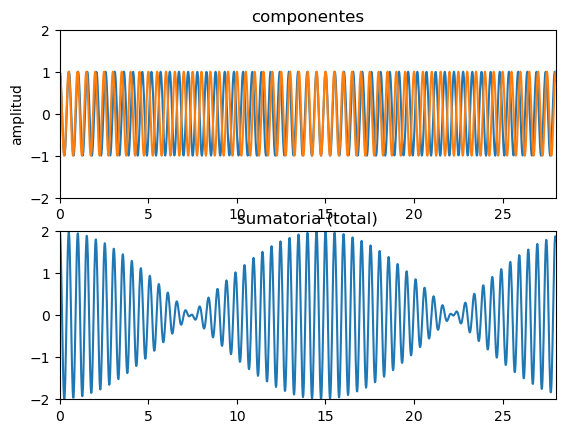

In [19]:
fig, axs = plt.subplots(2)
axs[0].plot(t / 24, ETA1, t / 24, ETA2)
axs[0].set_title('componentes')
axs[0].axis([0, t[-1] / 24, -2, 2])
axs[0].set_ylabel('amplitud')

axs[1].plot(t / 24, ETA)
axs[1].axis([0, t[-1] / 24, -2, 2])
axs[1].set_title('sumatoria (total)')

## Genera Mareas

In [65]:
# Rutina para reproducir ondas de marea 
# Componentes diurnos de marea:
O1=25.82; P1=24.07; K1=23.93;
# Componentes semidiurnos de marea:
M2=12.42;S2=12;N2=12.66;
# Componentes largos
Mf=327.9; Ssa=4383;

In [66]:
# periodos, amplitudes y fases en radianes  diurnas
T1=O1;  T2=K1;  a1=0.1686;  a2=0.1803;  e1=298;     e2=80.2;
T3=P1;  T4=M2;  a3=0.0597;  a4=0.0458;  e3=310.27;  e4=102.2;    
T5=S2;  T6=N2;  a5=0.0055;  a6=0.0168;  e5=303.20;  e6=323.38;  rad=np.pi/180; 

In [67]:
# fabricación del vector tiempo
fm = 6                          # en ciclos por hora 
endt = 60 * 24                  # calculo de la cantidad de datos (numero de días en formato horas)
t = np.arange(0, endt, 1/fm)    # vector de tiempo

In [68]:
F = (a2 + a1) / (a3 + a4) # factor de forma

ETA1 = a1 * np.cos((2 * np.pi / T1) * t + (e1 * rad))
ETA2 = a2 * np.cos((2 * np.pi / T2) * t + (e2 * rad))
ETA3 = a3 * np.cos((2 * np.pi / T3) * t + (e3 * rad))
ETA4 = a4 * np.cos((2 * np.pi / T4) * t + (e4 * rad))
ETA5 = a5 * np.cos((2 * np.pi / T5) * t + (e5 * rad))
ETA6 = a6 * np.cos((2 * np.pi / T6) * t + (e6 * rad))

ETA = ETA1 + ETA2 + ETA3 + ETA4 + ETA5 + ETA6

Text(0.5, 1.0, 'resultante')

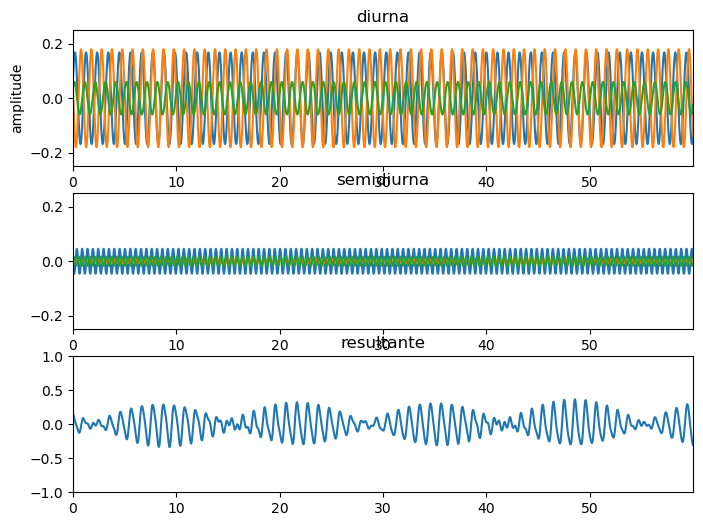

In [70]:
fig, axs = plt.subplots(3, figsize=(8,6))

axs[0].plot(t/24, ETA1, t/24, ETA2, t/24, ETA3)
axs[0].set_title('diurna')
axs[0].axis([0, t[-1]/24, -0.25, 0.25])
axs[0].set_ylabel('amplitude')

axs[1].plot(t/24, ETA4, t/24, ETA5, t/24, ETA6)
axs[1].axis([0, t[-1]/24, -0.25, 0.25])
axs[1].set_title('semidiurna')

axs[2].plot(t/24,ETA)
axs[2].axis([0, t[-1]/24, -1, 1])
axs[2].set_title('resultante')

In [25]:
T = np.array([25.82, 23.93, 12.42, 12, 327.9, 4383])
a = np.array([1, 1.2, 0.1, 0.13, 0.05, 0.1])
e = np.array([0, 0, 0, 0, 0, 0])

In [26]:
# fabricaciòn del vector tiempo
fm      = 6                         # en ciclos por hora 
endt    = 360 * 24                  # calculo de la cantidad de datos (numero de días en formato horas)
t       = np.arange(0, endt, 1/fm)  # vector de tiempo

ETA = np.zeros((T.size, t.size))

In [28]:
for i in range(T.size):
    ETA[i,:] = a[i] * np.cos((2 * np.pi/T[i]) * t + e[i])

ETAt = np.sum(ETA, axis=0)

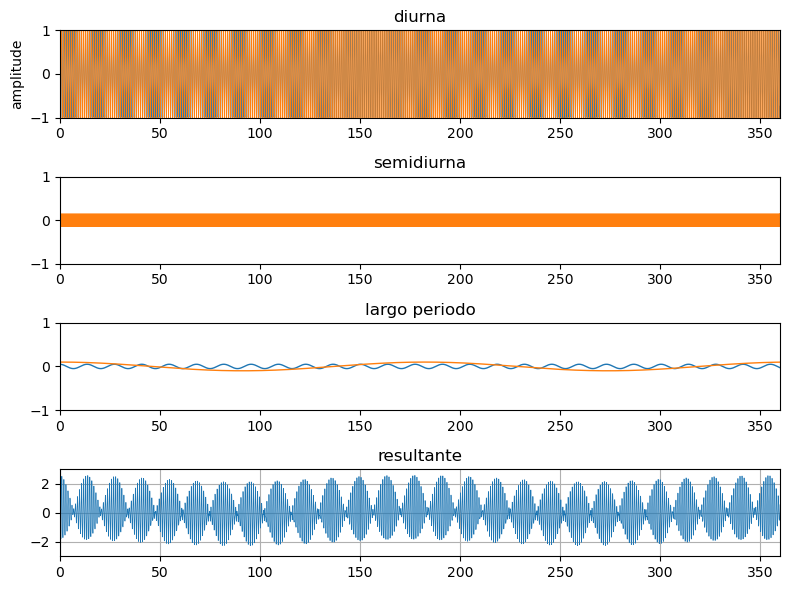

In [63]:
fig, axs = plt.subplots(4, figsize=(8,6))
axs[0].plot(t/24, ETA[0,:], t/24, ETA[1,:], linewidth=0.5)
axs[0].set_title('diurna')
axs[0].axis([0, t[-1]/24, -1, 1])
axs[0].set_ylabel('amplitude')

axs[1].plot(t/24, ETA[2,:], t/24, ETA[3,:])
axs[1].axis([0, t[-1]/24, -1, 1])
axs[1].set_title('semidiurna')

axs[2].plot(t/24, ETA[4,:], t/24, ETA[5,:], linewidth=1)
axs[2].axis([0, t[-1]/24, -1, 1])
axs[2].set_title('largo periodo')

axs[3].plot(t/24, ETAt, linewidth=0.5)
axs[3].axis([0, t[-1]/24, -3, 3])
axs[3].set_title('resultante')
plt.grid()

plt.tight_layout()  # Ajustar el espaciado entre las subgráficas
